In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

In [4]:
# Load the labelled dataset
data = pd.read_csv('train.csv', encoding='latin-1')

In [5]:
# Preprocess the labelled dataset
def preprocess(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove mentions
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove URLs
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text) # Remove special characters
    text = text.lower() # Convert to lowercase
    words = nltk.word_tokenize(text) # Tokenize
    words = [word for word in words if word not in stopwords.words('english')] # Remove stop words
    words = [nltk.stem.PorterStemmer().stem(word) for word in words] # Stemming
    return ' '.join(words)

data['text'] = data['text'].apply(preprocess)

In [6]:
# Extract features from the preprocessed data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text']).toarray()
y = data['sentiment']

In [7]:
# Train the SVM algorithm
svm = SVC(kernel='linear', decision_function_shape='ovr', random_state=0)
svm.fit(X, y)


SVC(kernel='linear', random_state=0)

In [9]:
# Load the unlabelled dataset
unlabelled_data = pd.read_csv(r'C:\Users\Reina\Desktop\demonitization.csv', encoding='latin-1')

In [11]:
# Preprocess the unlabelled dataset
unlabelled_data['Tweet'] = unlabelled_data['Tweet'].apply(preprocess)

In [13]:
# Extract features from the preprocessed unlabelled data
X_unlabelled = vectorizer.transform(unlabelled_data['Tweet']).toarray()

In [14]:
# Predict the sentiments of the unlabelled data using the trained SVM algorithm
y_unlabelled = svm.predict(X_unlabelled)

In [17]:
# Save predictions to a file
unlabelled_data['sentiment'] = y_unlabelled
unlabelled_data.to_csv('svmdemonitization.csv', index=False)

Text(0.5, 1.0, 'Distribution of sentiments')

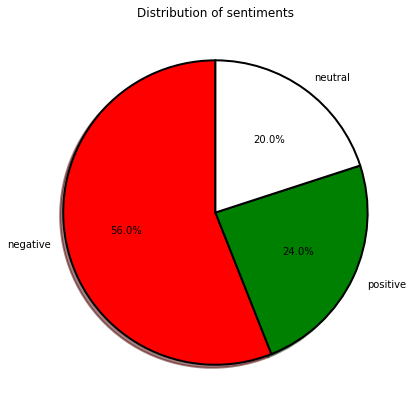

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(7,7))
colors = ("red", "green", "white")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = unlabelled_data['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = None, label='')
plt.title('Distribution of sentiments')